In [3]:
# Copyright Tay Zhi Cong, year 2025

import random
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math
import sys
np.set_printoptions(threshold=sys.maxsize)


#### form a 21-tap low-pass half-band filter

In [40]:
n = np.arange(-5, 5.5, 0.5) 
h = np.sinc(n)

#### stem the impulse response, plot the magnitude spectrum and then the log magnitude spectrum

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-2.77555756e-17j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00-1.11022302e-16j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -1.11022302e-16+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -1.11022302e-16+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -5.55111512e-17+0.00000000e+00j -2.77555756e-17+0.00000000e+00j
 -3.46944695e-17+0.00000000e+00j -2.77555756e-17+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

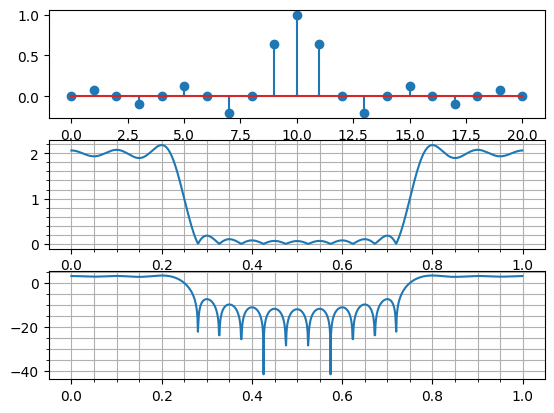

In [25]:
ax1 = plt.subplot(3,1,1)
ax1.stem(h)

freq_response1 = np.fft.fft(h, 1024)
freq_response2 = np.fft.fft(h[:-1], 1024)
print(freq_response1 - freq_response2)
ff = np.arange(0, 1, 1/1024) * 1
ax2 = plt.subplot(3,1,2)
ax2.plot(ff, abs(np.fft.fft(h, 1024)))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ax2 = plt.subplot(3,1,3)
ax2.plot(ff, 10*np.log10(abs(np.fft.fft(h, 1024))))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")

#### DC gain of the filter is approximately 2

#### Sum the impulse response to get the appropriate scale factor to apply to the impulse response to set the DC gain to unity

In [43]:
print("sum of the impulse response is", sum(h))

sum of the impulse response is 2.0630539690963423


#### the location of the impulse response zeros are multiples of 2, except at its highest peak

#### Scale the impulse response and replot it

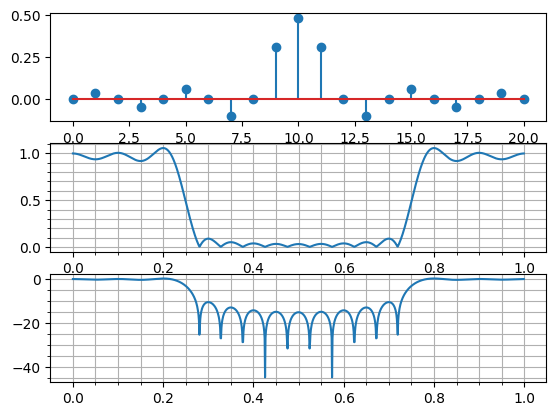

In [44]:
h = h/sum(h)
ax1 = plt.subplot(3,1,1)
ax1.stem(h)
ff = np.arange(0, 1, 1/1024) * 1
ax2 = plt.subplot(3,1,2)
ax2.plot(ff, abs(np.fft.fft(h, 1024)))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")
ax2 = plt.subplot(3,1,3)
ax2.plot(ff, 10*np.log10(abs(np.fft.fft(h, 1024))))
ax2.grid(True)
ax2.minorticks_on()
ax2.grid(which="minor")

#### The value of normalized frequency corresponding to amplitude 0.5 is 0.25

#### Extra investigation:

In [35]:
n = np.arange(-5, 5.5, 0.5) 
h = np.sinc(n)
h = h/sum(h)

# reshape h into 2 path after discarding the last sample in the window to ensure DFT-symmetry. 
# See "On the Use of Windows for Harmonic Analysis with the DiscreteFourierTransform"
h_reshaped = np.reshape(h[:-1], (-1,2))



# print(h_reshaped)

# ax1 = plt.subplot(3,1,1)
# ax1.stem(h)
# ff = np.arange(0, 1, 1/1024) * 1
# ax2 = plt.subplot(3,1,2)
# ax2.plot(ff, abs(np.fft.fft(h, 1024)))
# ax2.grid(True)
# ax2.minorticks_on()
# ax2.grid(which="minor")
# ax2 = plt.subplot(3,1,3)
# ax2.plot(ff, 10*np.log10(abs(np.fft.fft(h, 1024))))
# ax2.grid(True)
# ax2.minorticks_on()
# ax2.grid(which="minor")